In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import time

In [73]:
df_water = pd.read_csv('./water_usage.csv')
df_water.drop(['unit'], axis=1, inplace=True)
df_water.head()
A = np.sum(df_water['Total'])/1e3
lamb = 0.1

df_elec = pd.read_csv('./elec_usage.csv')
B = np.sum(df_elec['Elec Consumption(in billion kwh)'])/365
print(B)


1.8383986912054793


In [74]:
df = pd.read_csv('./dam_elec_water.csv')
elecG = df['elecG'].to_numpy()
elecH = df['elecH'].to_numpy()
waterG = df['waterG'].to_numpy()
levelG = df['levelG'].to_numpy()
waterH = df['waterH'].to_numpy()
levelH = df['levelH'].to_numpy()

def water_convert(water):
    water = water * 325851.429 / 1e9
    return water

waterG = water_convert(waterG)
waterH = water_convert(waterH)

In [75]:
from sympy import *
def ln_fitting(X, Y): ### Y = a * ln X + b
    ### the type of X and Y should be np.array
    a = Symbol('a')
    b = Symbol('b')
    poly1 = a * np.sum(np.square(np.log(X))) + b * np.sum(np.log(X)) - np.sum(np.log(X) * Y) 
    poly2 = a * np.sum(np.log(X)) + b * len(X) - np.sum(Y)
    a, b =  list(solve([poly1, poly2], [a, b]).values())[0], list(solve([poly1, poly2], [a, b]).values())[1]
    return a, b


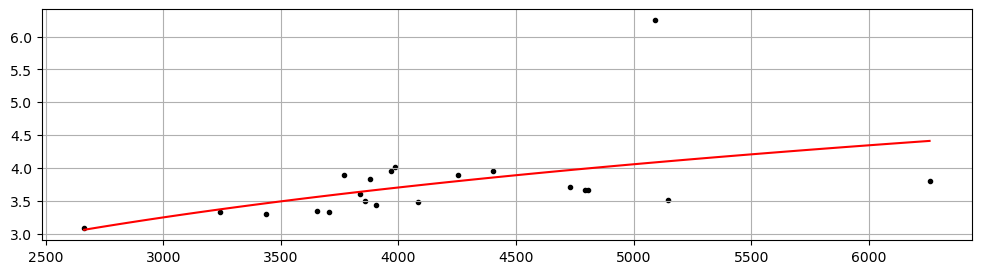

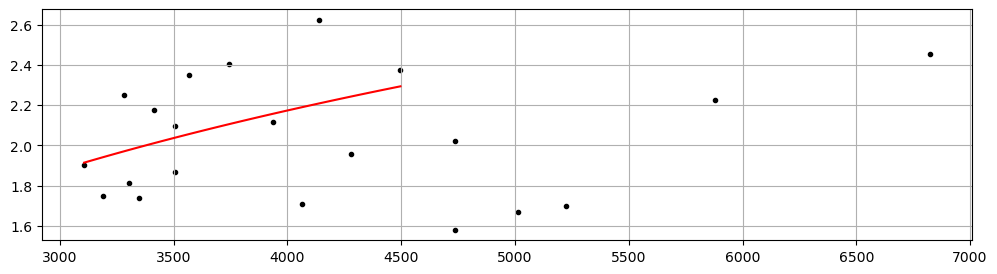

In [76]:
data_g, data_h, data_elec_g, data_elec_h = waterG, waterH[waterH < 4500], elecG, elecH[waterH < 4500]

# elec = mu * ln(water) + phi
fig = plt.figure(figsize =(12,3))
plt.scatter(waterG, elecG,marker = '.',color = 'k')
plt.grid(True)
mu_G, phi_G = ln_fitting(data_g, data_elec_g)

### plot the fitting curve
x = np.linspace(min(data_g), max(data_g), 100)
y = mu_G * np.log(x) + phi_G
plt.plot(x, y, color = 'r')


fig = plt.figure(figsize =(12,3))
plt.scatter(waterH, elecH,marker = '.',color = 'k')
plt.grid(True)
mu_H, phi_H = ln_fitting(data_h, data_elec_h)

### plot the fitting curve
x = np.linspace(min(data_h), max(data_h), 100)
y = mu_H * np.log(x) + phi_H
plt.plot(x, y, color = 'r')


In [77]:
print("Fitting for dam G, elecG -> waterG")
print("---------------------")
print('slope: %.4f' % mu_G)
print('intercept: %.4f' % phi_G)
print('The linear regression function: y = %.4f ln(x) + %.4f' %
      (mu_G, phi_G))

print("Fitting for dam H, elecH -> waterH")
print("---------------------")
print('slope: %.4f' % mu_H)
print('intercept: %.4f' % phi_H)
print('The linear regression function: y = %.4f ln(x) + %.4f' %
      (mu_H, phi_H))


Fitting for dam G, elecG -> waterG
---------------------
slope: 1.5825
intercept: -9.4220
The linear regression function: y = 1.5825 ln(x) + -9.4220
Fitting for dam H, elecH -> waterH
---------------------
slope: 1.0253
intercept: -6.3298
The linear regression function: y = 1.0253 ln(x) + -6.3298


slope: 33.2911
intercept: -115988.7435
The linear regression function: y = 33.2911x + -115988.7435
The transformation from level to water volumn for dam G is: volume = 33.2911 * level + -115988.7435


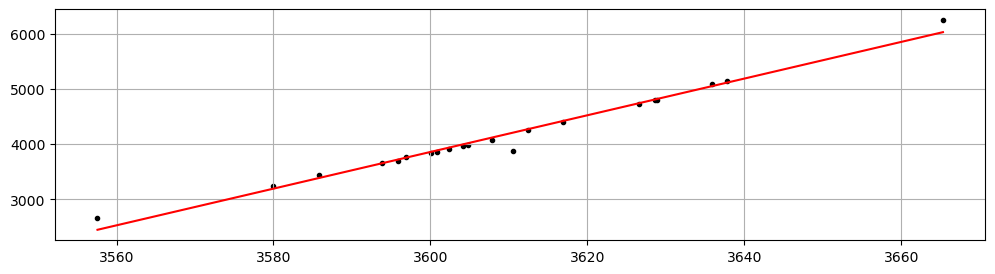

In [78]:
# water = a * level + b
fig = plt.figure(figsize =(12,3))
plt.scatter(levelG,waterG,marker = '.',color = 'k')
plt.grid(True)

level2waterG = linear_model.LinearRegression()
level2waterG.fit(levelG[:,None], waterG[:,None])

print('slope: %.4f' % level2waterG.coef_[0])
print('intercept: %.4f' % level2waterG.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(level2waterG.coef_[0], level2waterG.intercept_))
print('The transformation from level to water volumn for dam G is: volume = %.4f * level + %.4f' %(level2waterG.coef_[0], level2waterG.intercept_))

x = np.linspace(min(levelG), max(levelG), 100)
y = level2waterG.coef_[0] * x + level2waterG.intercept_
plt.plot(x, y, color = 'r')
plt.show()

slope: 31.7856
intercept: -31137.1030
The linear regression function: y = 31.7856x + -31137.1030
The transformation from level to water volumn for dam H is: volume = 31.7856 * level + -31137.1030


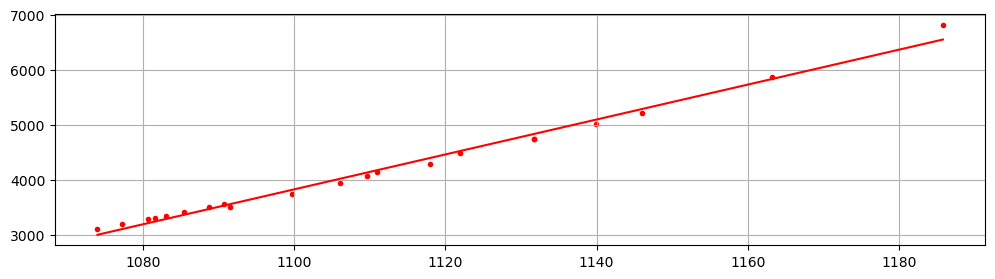

In [79]:
# water = a * level + b
fig = plt.figure(figsize =(12,3))
plt.scatter(levelH,waterH,marker = '.',color = 'r')
plt.grid(True)

level2waterH = linear_model.LinearRegression()
level2waterH.fit(levelH[:,None], waterH[:,None])

print('slope: %.4f' % level2waterH.coef_[0])
print('intercept: %.4f' % level2waterH.intercept_)
print('The linear regression function: y = %.4fx + %.4f' %(level2waterH.coef_[0], level2waterH.intercept_))
print('The transformation from level to water volumn for dam H is: volume = %.4f * level + %.4f' %(level2waterH.coef_[0], level2waterH.intercept_))

x = np.linspace(min(levelH), max(levelH), 100)
y = level2waterH.coef_[0] * x + level2waterH.intercept_
plt.plot(x, y, color = 'r')
plt.show()


$\mathrm{H}$ 坝水位为 $\mathrm{M}, \mathrm{G}$ 坝水位是 $\mathrm{P}$，对应的水量分别为 $\mathrm{M}_v, \mathrm{P}_v$ 。设 $\mathrm{G}$ 坝中的 $\lambda$ 比例出水会进入 $\mathrm{H}$ 坝, $\mathrm{H}$ 坝单位时间出水量(出水速率)为 $x$, $\mathrm{G}$ 坝单位时间出水量为 $y$。所有单位时间水需求量是 $A=a_1+a_2+a_3+a_4+a_5$, 单位时间电需求量是 $B=b_1+b_2+b_3+b_4+b_5$。满足用电需求下的最低水位分别为 $M_{\min v}, P_{\min v}$，水坝发电的最低水位分别为 $loss_H, loss_G$。电力和水量转换关系为：$water=\mu*ln(level)+\phi$, 系数分别对应为 $\mu_H, \mu_G, \phi_H, \phi_G$, 两个大坝的最长持续时间是 $T$。那么满足以下公式：

已知数据: $M, P, A, B, \mu_H, \mu_G, \phi_H, \phi_G, \lambda$ 要求: $x, y, T, M_{\min v}, P_{\min v}$
- $M_v + \lambda * y * T - x * T=M_{\min v} * T$
- $P_v -y * T=P_{\min v} * T$
- $A=x+(1-\lambda) * y$
- $B=\mu_H * ln(M_{\min v}) + \phi_H + \mu_G * ln(P_{\min v}) + \phi_G$
- $ \frac{M_v}{P_v} = \frac{M_{\min v}}{P_{\min v}} $

解为:

$$
\begin{aligned}
& r = \frac{M_v}{P_v} \\
& P_{\min v} = \mathrm e ^ {(B - \phi_H - \phi_G - \mu_H * ln(r)) / (\mu_H + \mu_G)} \\
& M_{\min v} = r * P_{\min v} \\
& T=\frac{(r+1) * P_v}{A + (r+1) * P_{\min v}}\\
& y=\frac{P_v}{T} - P_{\min v} \\
& x=A + (\lambda - 1) * y \\
\end{aligned}
$$

In [80]:
# M is dam H, P is dam G
M, P = 1074.01, 3557.57

loss_H = level2waterH.coef_[0]*950.0 + level2waterH.intercept_
loss_H = loss_H.squeeze()
loss_G = level2waterG.coef_[0]*3490 + level2waterG.intercept_
loss_G = loss_G.squeeze()
print(loss_H, loss_G)
M_v = level2waterH.coef_[0]*M + level2waterH.intercept_ - loss_H
M_v = M_v.squeeze()
P_v = level2waterG.coef_[0]*P + level2waterG.intercept_ - loss_G
P_v = P_v.squeeze()
print(M_v, P_v)
ratio = M_v/P_v
P_min = exp((B - mu_H * ln(ratio) - phi_H - phi_G)/(mu_G + mu_H))
M_min = ratio * P_min
T = (ratio+1) * P_v / (A + (ratio + 1) * P_min)
y = P_v / T - P_min
x = A + (lamb - 1) * y
print("Assume M and P is 3610.47 and 1080.68, respectively (2021 data)")
print("All the pre-known parameters known from data are:")
print("------------------------------------------------")
print("A = ", A, "with the unit of billion gallons per day")
print("B = ", B, "with the unit of billion kwh per day")
print("lambda = ", lamb)
print("mu_1 = ", mu_H)
print("phi_1 = ", phi_H)
print("mu_2 = ", mu_G)
print("phi_2 = ", phi_G)
print("\n")
print("The further calculated parameters are:")
print("------------------------------------------------")
print('M_v is : {}'.format(M_v + loss_H))
print('P_v is : {}'.format(P_v + loss_G))
print("Assume the ratio is M_v / P_v = M_min v / P_min v = {}".format(ratio))
print("M_min v is : {}".format(M_min))
print("P_min v is : {}".format(P_min))
print()
print("The final result is:")
print("------------------------------------------------")
print("x = {}".format(x))
print("y = {}".format(y))
print("T = {}".format(T))


-940.7579908536463 197.10793241368083
3941.7355268502142 2249.4779321705428
Assume M and P is 3610.47 and 1080.68, respectively (2021 data)
All the pre-known parameters known from data are:
------------------------------------------------
A =  44.26947 with the unit of billion gallons per day
B =  1.8383986912054793 with the unit of billion kwh per day
lambda =  0.1
mu_1 =  1.02529154681883
phi_1 =  -6.32984091702877
mu_2 =  1.58247868054594
phi_2 =  -9.42198213302009


The further calculated parameters are:
------------------------------------------------
M_v is : 3000.977535996568
P_v is : 2446.5858645842236
Assume the ratio is M_v / P_v = M_min v / P_min v = 1.7522890402604643
M_min v is : 1194.75600351919
P_min v is : 681.825872369549

The final result is:
------------------------------------------------
x = 29.7933294431094
y = 16.0846006187674
T = 3.22316116354970


In [81]:
(B - mu_H * ln(ratio) - 15)/(mu_G + mu_H)

-5.26760783219369

slope: 1.1372
intercept: -4.4691
The linear regression function: y = 1.1372 lnx + -4.4691


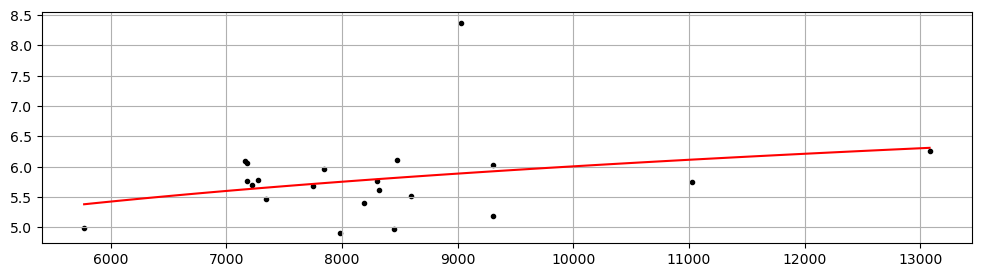

In [82]:
### add on Jan 12
fig = plt.figure(figsize =(12,3))
plt.scatter(waterG+waterH, elecG+elecH ,marker = '.',color = 'k')
plt.grid(True)
# elec = a * water + b
data = np.array([waterG+waterH, elecG+elecH])
a, b = ln_fitting(data[0], data[1])
### plot the fitting line
x = np.linspace(min(data[0]), max(data[0]), 100)
y = a * np.log(x) + b
plt.plot(x, y, 'r')

print('slope: %.4f' % a)
print('intercept: %.4f' % b)
print('The linear regression function: y = %.4f lnx + %.4f' %(a, b))
